<a href="https://colab.research.google.com/github/rafarafa91/practica1/blob/main/Tarea1_proyecto_aplicado_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


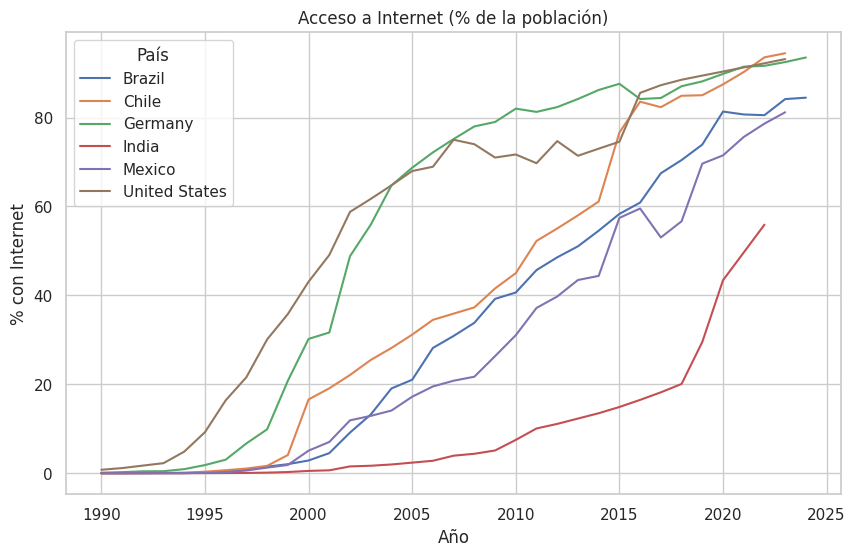

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

ruta = "/content/drive/MyDrive/Colab_Notebooks/Bases_de_datos_brecha_tecnologica/"

def cargar_wdi(nombre_archivo, nombre_variable):
    df = pd.read_csv(ruta + nombre_archivo, skiprows=4)

    # Eliminar columnas vacías tipo 'Unnamed'
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    # Eliminar columnas de metadata
    df = df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

    # Pasar de formato ancho a largo
    df = df.melt(
        id_vars=['Country Name'],
        var_name='anio',
        value_name=nombre_variable
    )

    df.rename(columns={'Country Name': 'pais'}, inplace=True)

    # Convertir año a entero (ya seguro)
    df['anio'] = df['anio'].astype(int)

    return df

internet = cargar_wdi("poblacion_con_internet.csv", "internet")
moviles = cargar_wdi("suscripciones_moviles.csv", "moviles")
poblacion = cargar_wdi("poblacion_total.csv", "poblacion")
pib = cargar_wdi("PIB_per_capita.csv", "pib_per_capita")


df = internet.merge(moviles, on=['pais','anio'], how='inner') \
             .merge(poblacion, on=['pais','anio'], how='inner') \
             .merge(pib, on=['pais','anio'], how='inner')

paises_interes = [
    'Mexico',
    'United States',
    'Brazil',
    'Chile',
    'Germany',
    'India'
]

df_filtrado = df[df['pais'].isin(paises_interes)]

df_filtrado.head()
df_filtrado.shape
df_filtrado.describe()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_filtrado, x='anio', y='internet', hue='pais')
plt.title('Acceso a Internet (% de la población)')
plt.xlabel('Año')
plt.ylabel('% con Internet')
plt.legend(title='País')
plt.show()


